In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('heart_diseasesss.csv')

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [32]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold) 
    return column[~outlier_mask]

In [34]:
col_name = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']
for col in col_name:
    df[col] = remove_outliers(df[col])

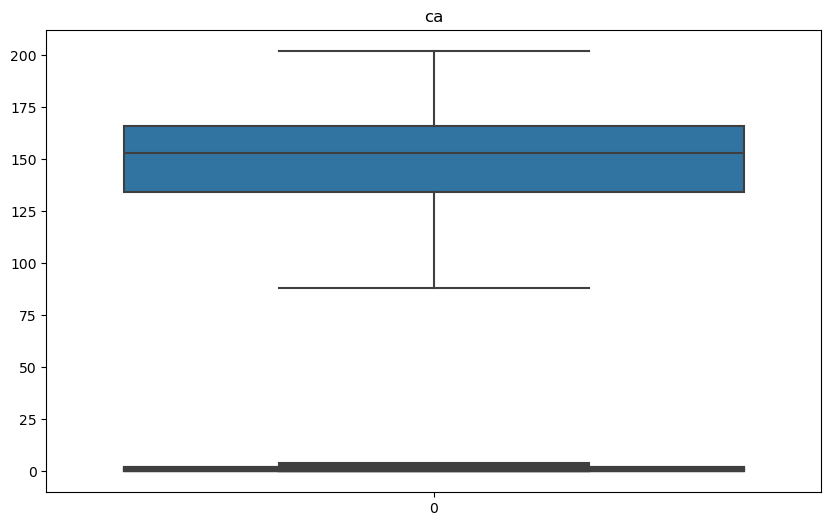

In [36]:
plt.figure(figsize=(10, 6)) 
for col in col_name:
  sns.boxplot(data=df[col])
plt.title(col)
plt.show()

In [37]:


from sklearn.tree import DecisionTreeClassifier

X = df.drop('target', axis=1)
y = df['target']

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42) 
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")



Accuracy: 0.7377049180327869
Confusion Matrix:
[[25  4]
 [12 20]]
